# **Exploratory Data Analysis** :          

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

---


> Here we are using the Google Playstore dataset, which 
contains details about the Apps in playstore, there are more than 10,0000+ Apps in the playstore.The size of the dataset is 210Mb.



> The main objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.





> The dataset we are using is taken from the Kaggle, the link of the dataset is given below



> ↪ *Exploratory Data Analysis on Google playstore dataset*


> ↪ *Dataset link*🔗 [*kaggle link*](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps)



 





## Importing the dependecies

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Downloading the dataset
 ↪ using opendatsets

In [109]:
! pip install opendatasets --quiet

In [ ]:
import opendatasets as od 
dataset_url = 'https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(dataset_url)

# Data Preparation and Cleaing
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset
 
 ↪ Dealing with the missing data and the incorrect records

In [111]:
df = pd.read_csv('/content/google-playstore-apps/Google-Playstore.csv')

 viewing the first 5 rows of the datset

In [ ]:
df.head(5)

Let's see what are the columns were given in the Google-Playstore dataset

In [ ]:
df.columns

let's see the shape of the dataset

In [ ]:
df.shape

In [ ]:
df.info()

## Observation:

---
1. The dataset having   2312944 rows and 24 columns 
2. The columns in the dataset are:
 
        'App Name', 'App Id', 'Category', 'Rating', 'Rating Count, Installs','Minimum Installs', 'Maximum Installs', 'Free', 'Price', 
        'Currency','Size', 'Minimum Android', 'Developer Id', 'Developer Website','Developer Email', 'Released', 'Last Updated', 
        'Content Rating','Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice','Scraped Time'


## Descriptive statistics

In [ ]:
df.describe()

## Observation :    

---
1. we have 5 numerical columns in our dataset


To look the entire columns we can use pandas functon pd.set_option()

In [117]:
 pd.set_option('display.max_columns', None)

In [ ]:
df.head()

## Missing values in the data


In [ ]:
df.isnull().sum().sort_values(ascending = False)

# **Exploratory Analysis and Visualization**

## Let's plot the missing null values

Text(0.5, 1.0, 'Missing null values')

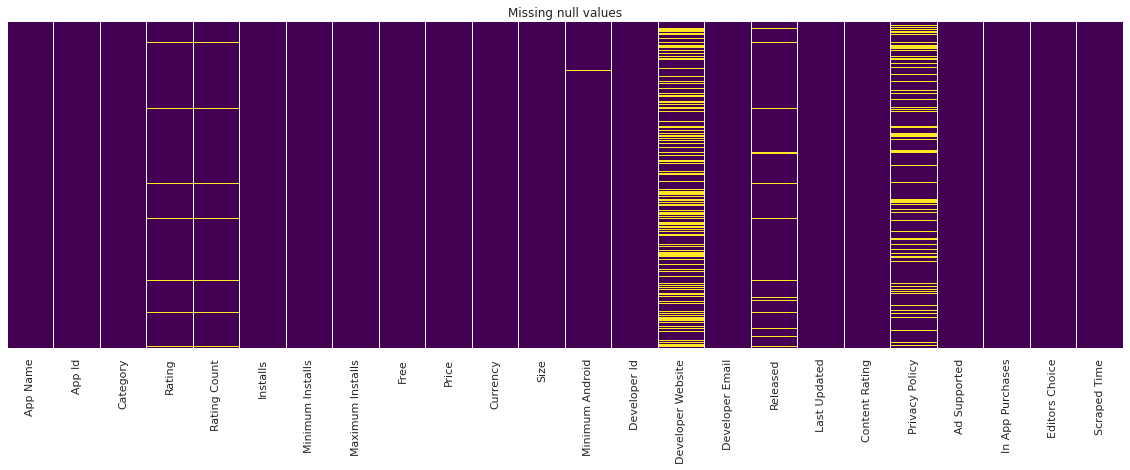

In [120]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

Let's see the missing percentage in data

In [ ]:
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)
missing_percentage

## Let's plot the missing percentage of null values

Text(0.5, 1.0, 'Missig percentage of null values')

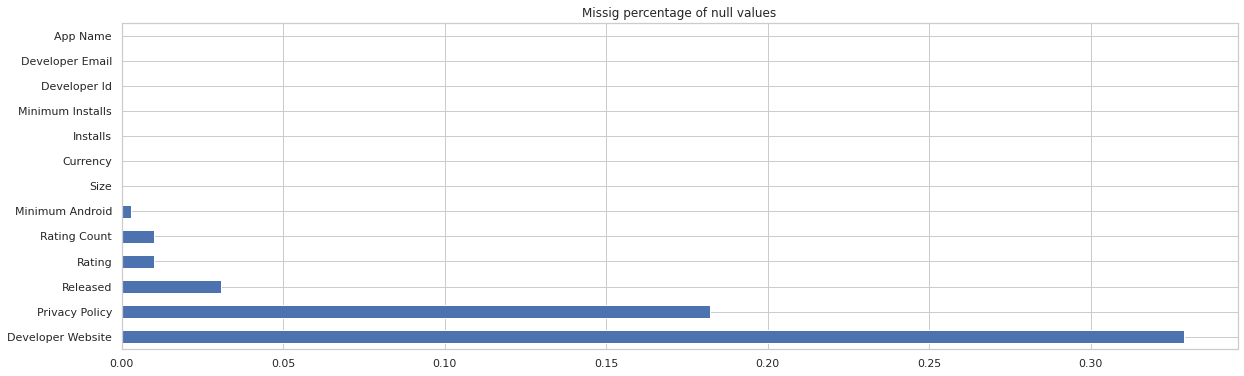

In [122]:
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
missing_percentage.plot(kind = 'barh')
plt.title("Missig percentage of null values")

## Observation : 
##Dealing with the null values
###1. The columns having highest percentage of null values are :
* Developer Website  
* Privacy Policy

these two are not that much helpful if we want we can drop these columns and in the further steps we drop and add some features in the dataset after the Analysis.

###2. we can drop the small null values for the columns

* Size                 
* Currency             
* Installs             
* Minimum Installs     
* Developer Id         
* Developer Email

###3. Rating,Rating Count,Released are important column so it is good to fill the null values.

* Rating 
* Rating count
* Minimum Andriod 
* Released 



## from observation 2 droping the null values of the columns got selected 

In [123]:
df.dropna(subset = ['App Name','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'], inplace = True)

In [ ]:
df.isnull().sum()

## Now let's start cleaning the each row

checking any duplicates in the App Name

In [125]:
boolean = df['App Name'].duplicated().any()
boolean

True

In [ ]:
df['App Name'].value_counts()

from the above cell output we can see that App Name column has multiple rows. Let's check out that data in those rows is identical or not

In [ ]:
df[df['App Name'] == 'Tic Tac Toe']

In [128]:
df['App Id'].duplicated().any()

False

In [ ]:
df['App Id'].value_counts()

   
1. we have the Apps with the same names but with the unique App IDs so the Apps are differed based on the App IDs

## let's Explore the numerical columns





In [ ]:
df['Installs'].unique()

In [131]:
df['Installs'] = df['Installs'].str.split('+').str[0]

In [ ]:
df['Installs'].unique()

replace the commas ',' in the install column

In [133]:
df['Installs'].replace(',','', regex=True, inplace=True)

In [134]:
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df['Currency'].unique()

In [ ]:
df['Size'].unique()

The Size of data can be in GB, MB and KB let's convert the data into the size in MB

In [137]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [ ]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

here we get a missmatched value with the data
we got the value 1,018 we can drop it or we can assume as it may be a '.' (dot) the would incorrectly added to the dataset. so let assume it as dot for now and repalce the ',' with the dot '.'

In [139]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

conversion of kbs to mb

In [140]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [ ]:
df['Size'] = df['Size'].apply(lambda x: float(x))

we get an another missmatch value in the data set which is 'Varies with device' it means the size of the App may vaies with the device---> but here I am assuming it as 0

In [141]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

In [144]:
df['Size'] = df['Size'].apply(lambda x: float(x))

conversion of data Gbs to Mb

In [145]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [146]:
df['Size'] = df['Size'].apply(lambda x: float(x))

In [ ]:
df.dtypes['Size']

In [ ]:
df['Minimum Android']

In [ ]:
df['Content Rating']

In [ ]:
df['Released']

In [ ]:
df['Last Updated']

In [ ]:
df['Privacy Policy']

In [ ]:
df['Scraped Time']

Creataing the column type for free and paid Apps by using the Free column, it's helpfull while dealing with the paid and Free Apps

In [154]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True )

let's clean the Content Rating column

In [ ]:
df['Content Rating'].unique()

In [ ]:
df['Content Rating'].value_counts()

## Observation :     
1. we have varies Categories in the content Rating column :    
   * Everyone
   * Teen
   * Mature 17+
   * Everyone 10+
   * Unrated
   * Adults only 18+             

Now, we makes this Categories to a simple 3 Categories for better understanding :     
   Everyone, Teen, Adults
    
   * Mature 17+   ----> to Adults
   * Everyone 10+ ----> to Teen
   * Unrated      ----> to Everyone
   * Adults only 18+ -> to Adults 

In [157]:
df["Content Rating"]=df["Content Rating"].replace("Unrated","Everyone")
df["Content Rating"]=df["Content Rating"].replace("Everyone 10+","Teen")
df["Content Rating"]=df["Content Rating"].replace("Mature 17+","Adults")
df["Content Rating"]=df["Content Rating"].replace("Adults only 18+","Adults")

In [ ]:
df['Content Rating'].unique()

In [ ]:
df.info()

In [ ]:
df['Rating'].unique()

In [ ]:
df['Rating Count'].unique()

let's change the Rating Count to certain ranges for the better understanding the data

In [ ]:
df['Rating Count'].max()

In [ ]:
df['Rating Type'] = 'NoRatingProvided'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'RatingType'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'RatingType'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'RatingType'] = 'More than 500K'
df.RatingType.value_counts()

In [ ]:
df.info()

# Question and Aswers :              


*  What are the top 10 Categories that are installed from the Google Play Store ?
*  Which are the Categories that are getting installed the most in top 10 Categories?
*  What is the higest rated Category ?

*  Which Category has the highest Paid and Free apps ?
*  How does the size of the Application impacts the Installation ?

*  What are the Top 5 Paid Apps based With highest ratings and installs ?
*  What are the Top 5 Free Apps based With highest      ratings and installs ?



### Q - What are the top 10 Categories that are installed from the Google Play Store ?

In [ ]:
df['Category'].unique()

In [166]:
top_Category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [ ]:
top_Category

In [168]:
Category_installs = df.groupby(['Category'])[['Installs']].sum()

In [ ]:
Category_installs

In [ ]:
top_Category_installs = pd.merge(top_Category, Category_installs, on='Category')
top_Category_installs.head(5)

In [171]:
top_10_Categories_installs = top_Category_installs.head(10).sort_values(by = ['Installs'],ascending = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


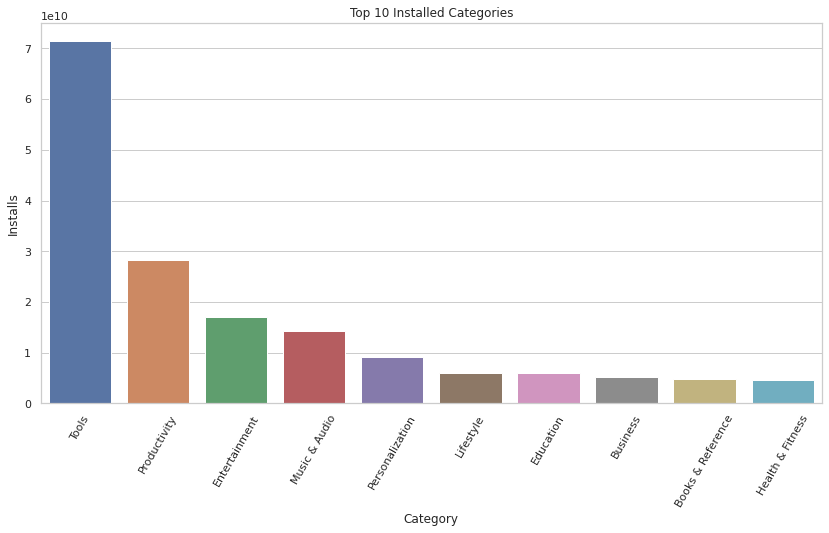

In [172]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")
sns.barplot(top_10_Categories_installs.Category, top_10_Categories_installs.Installs)

###Ans - Tools, Productivity,Education, Music & Audio, Personalization, Lifestyle, Education, Business, Books & Reference, Health & Fitness 

### Q -  Which are the Categories that are getting installed the most in top 10 Categories?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


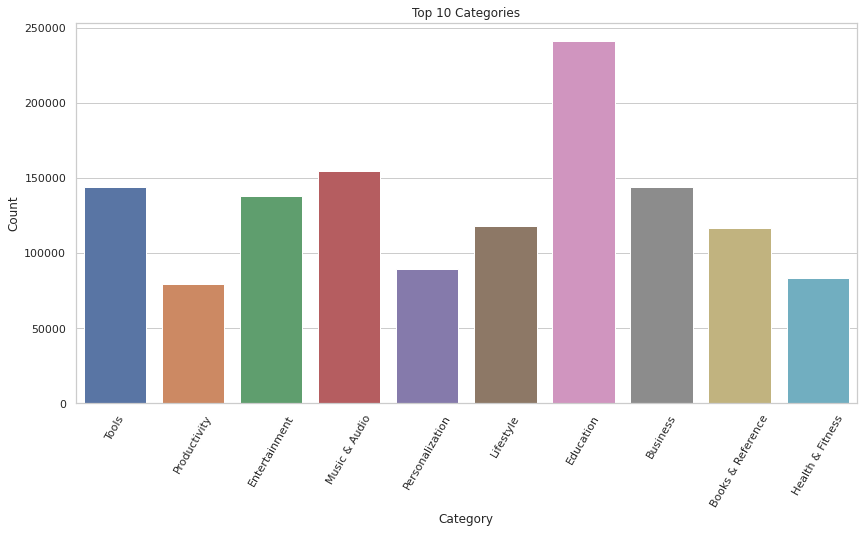

In [173]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Categories")
sns.barplot(top_10_Categories_installs.Category, top_10_Categories_installs.Count)


##Ans - Tools, Productivity,Education, Music & Audio, Personalization, Lifestyle, Education, Business, Books & Reference, Health & Fitness 

## Observation :
As we can see from the above two plots: Maxinum number of apps present in google play store comes under Education Tools, Business and Entertainment etc., Categories but as per the installation scenario it is different. Maximum installed apps comes under Tools, Productivity,Entertainment, Music & Audio etc.,

## visualize Total Categories and the count of Apps in each catgeroy 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


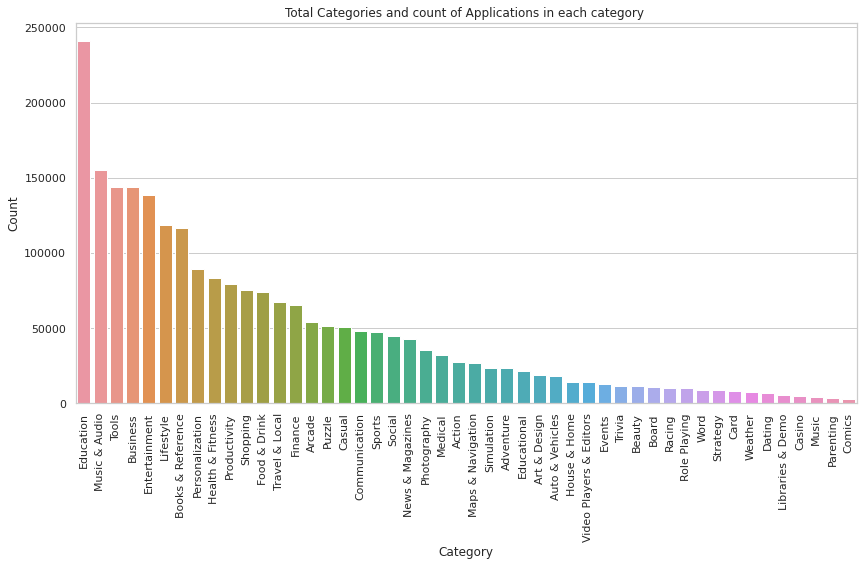

In [174]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Total Categories and count of Applications in each category ")
sns.barplot(top_Category_installs.Category, top_Category_installs.Count)


## Visualize Total Categories and installed Applications in each category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


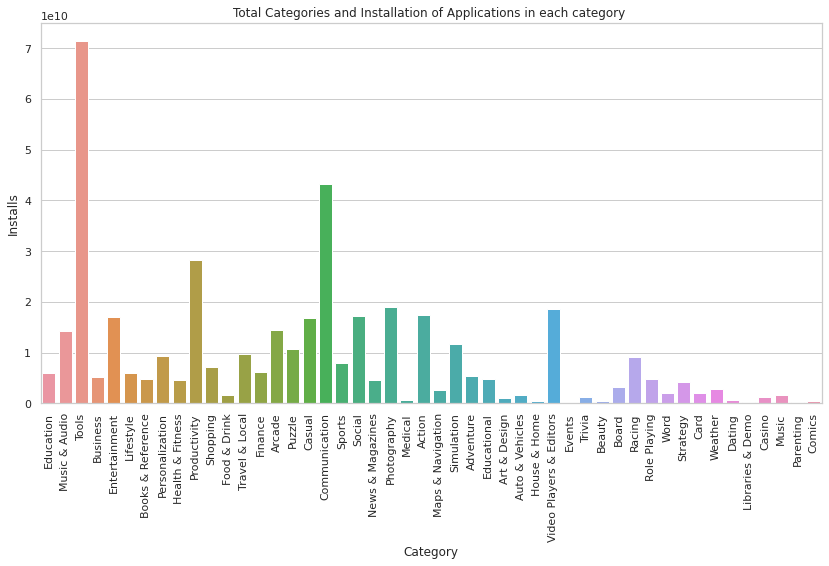

In [175]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Total Categories and Installation of Applications in each category ")
sns.barplot(top_Category_installs.Category, top_Category_installs.Installs)


Rating distribution

Text(0.5, 1.0, 'Distribution of Rating')

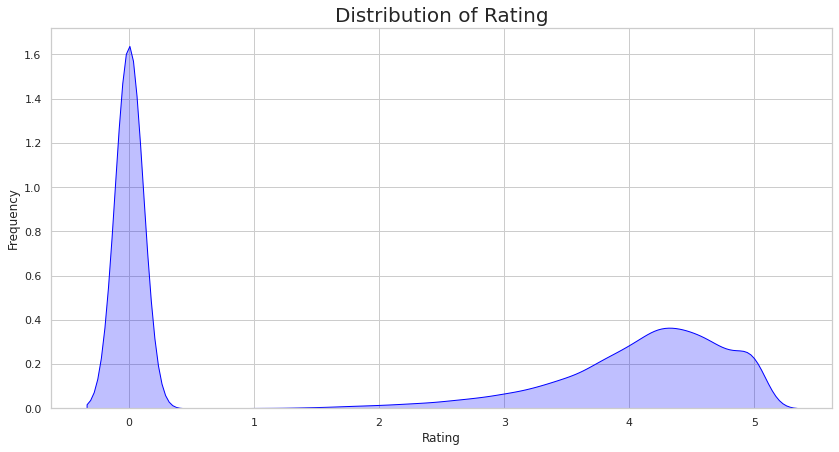

In [176]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(df.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

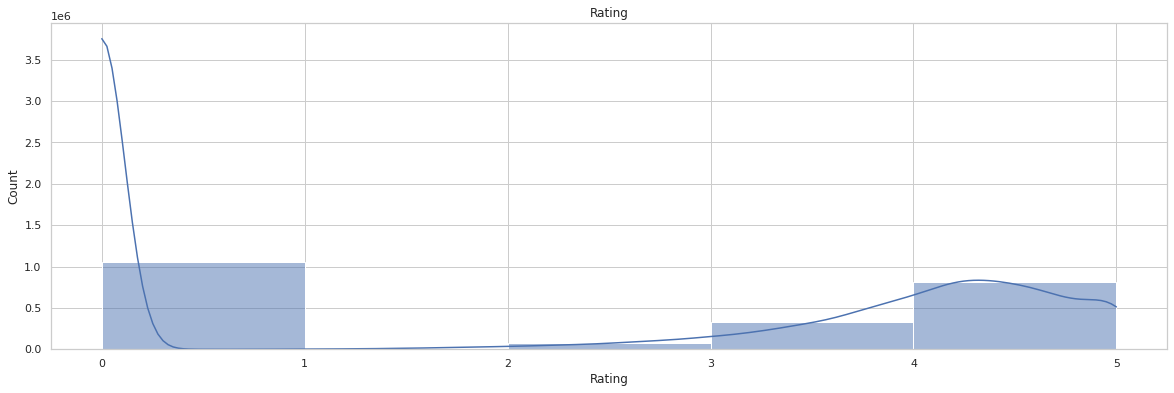

In [177]:
plt.title("Rating")
sns.histplot(df.Rating,kde=True,bins=5)

## Observation : 
From the above two plots we can see that most people does not give a rating,But one more thing that comes out from this graph as well is that people tend to give 4+ rating the most.

##Q - What is the higest rated Category?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


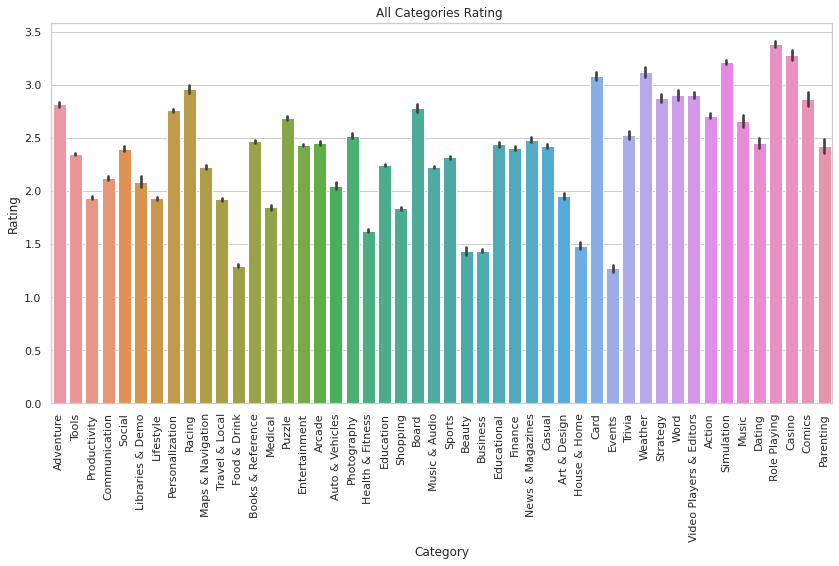

In [178]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(df.Category, df.Rating)

## Ans - From the above plot we can see that Role Playing is the highest Rated category


In [ ]:
df['Content Rating'].unique()

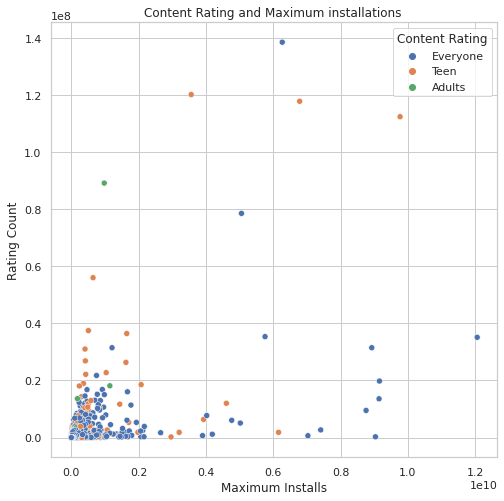

In [180]:
plt.figure(figsize=(8,8))
plt.title("Content Rating and Maximum installations ")
sns.scatterplot(x='Maximum Installs',y='Rating Count',data=df,hue='Content Rating')

## Observation :
This scatterplot shows us that:
 If we exclude everyone from the plot and when focus on Teen and Adults we can see that teens have much engagement in terms of download and rating count.

##Q - Which Category has the highest Paid and Free apps ?

In [181]:
app_count = df.groupby(['Category','Type'])[['App Name']].count().reset_index().rename(columns={'App Name':'Count','index':'App Name'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

Text(0.5, 1.0, 'Free and Paid Apps in Category')

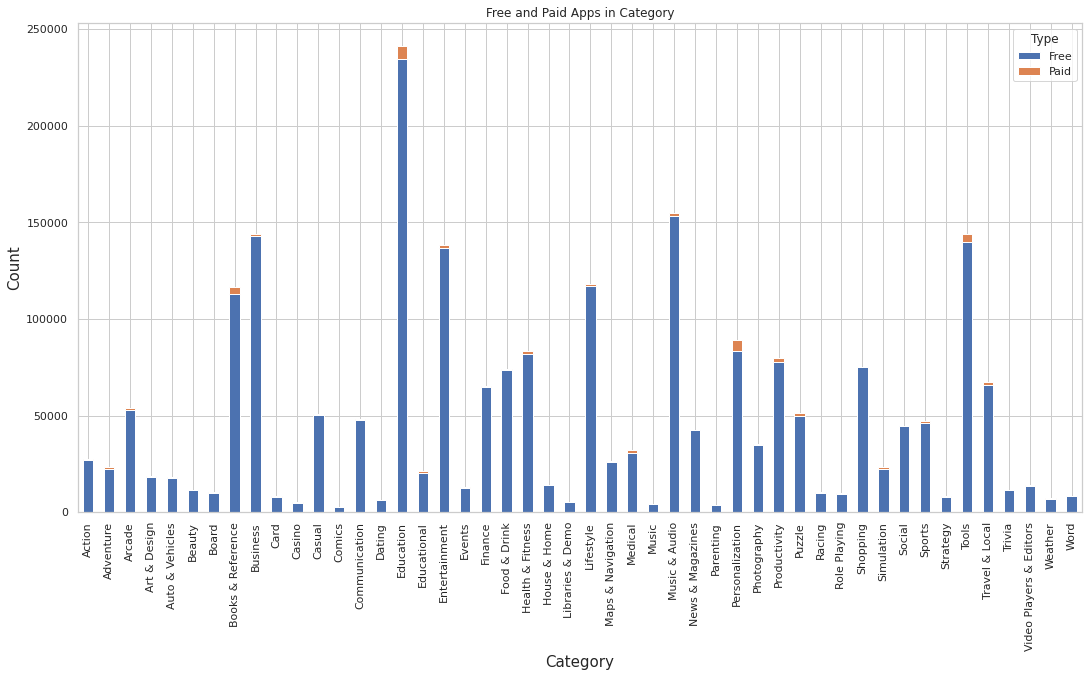

In [182]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9)) # try df_app_count.plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Free and Paid Apps in Category")

## Ans - Education Category is the highest in paid apps list

## Observaton : 
It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Business,Education, Music & Audio, Tools as well as Social categories were free to install. At the same time Books & References, Education, Tools and Personalization categories had the biggest number of paid apps available for Installation.

##visualize the Installation Types in each category



In [ ]:
df['Installs'].min(),df['Installs'].max()

There is a high variance in the number of installs, we need to reduce it so we can use a log value for this column, otherwise it would be unable to see the data when we visualize

In [184]:
categoty_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


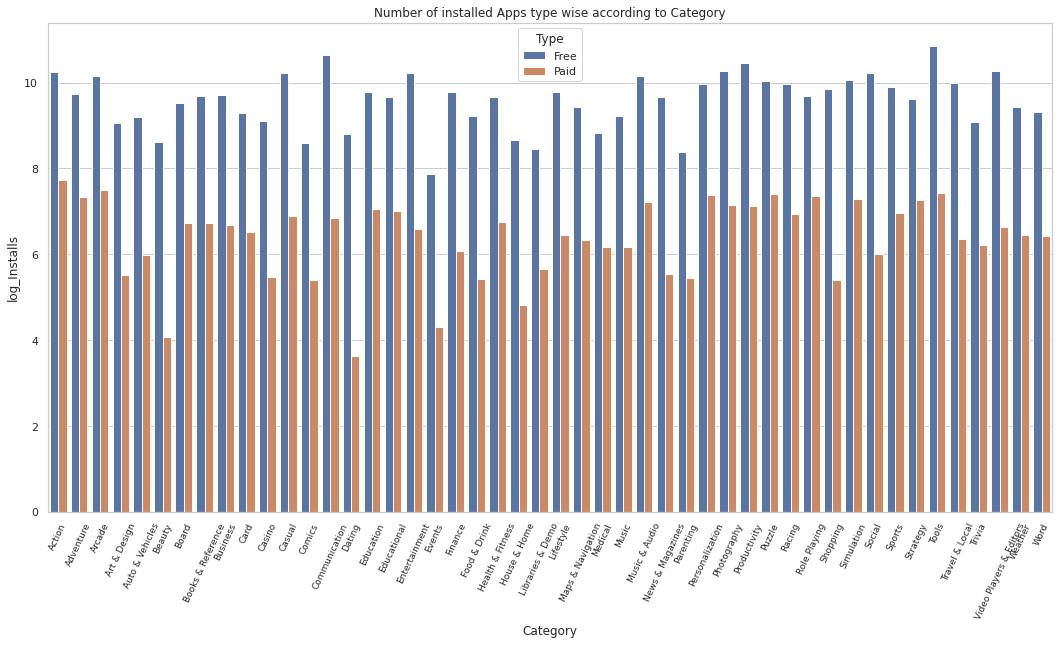

In [185]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed Apps type wise according to Category")
sns.barplot('Category','log_Installs', hue='Type', data=categoty_type_installs)

##Q - How does the size of the Application impacts the Installation ?

In [186]:
df['log_Installs'] = np.log10(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


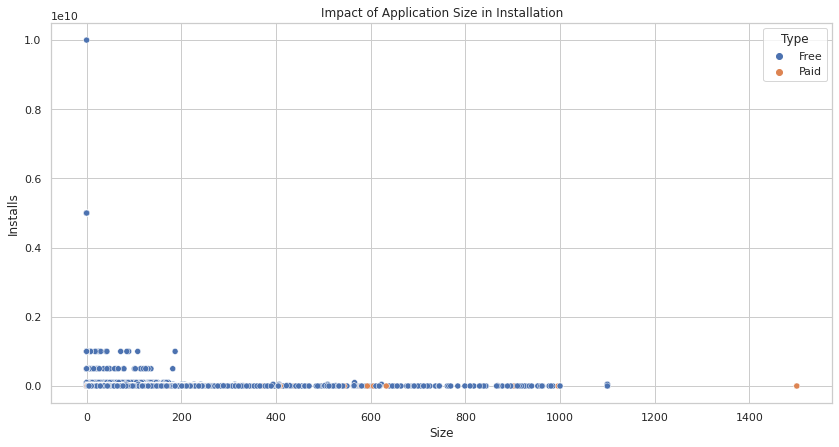

In [187]:
plt.figure(figsize=(14,7))
plt.xlabel("Size")
plt.ylabel("Installs")
plt.title("Impact of Application Size in Installation")
sns.scatterplot('Size','Installs', hue='Type', data=df)

##Ans - from the above plot we can see that size impacts the number of installations. Applications with large size are less installed by the user.

## Let's see some correlations


In [188]:
df.corr()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Ad Supported,In App Purchases,Editors Choice,log_Installs
Rating,1.000000,0.013038,0.011215,0.011215,0.012615,-0.003674,0.046099,0.160503,0.153824,0.019485,-0.023632
Rating Count,0.013038,1.000000,0.545281,0.545281,0.547571,-0.000411,0.013600,0.005294,0.025737,0.137311,0.076834
Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.004240,0.002249,0.014178,0.059932,0.077248
Minimum Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.004240,0.002249,0.014178,0.059932,0.077248
Maximum Installs,0.012615,0.547571,0.954037,0.954037,1.000000,-0.000515,0.005093,0.002881,0.016100,0.064206,0.079792
Price,-0.003674,-0.000411,-0.000461,-0.000461,-0.000515,1.000000,0.004160,-0.034281,-0.002636,0.000503,NaN
Size,0.046099,0.013600,0.004240,0.004240,0.005093,0.004160,1.000000,-0.042772,0.165194,0.039926,0.024328
Ad Supported,0.160503,0.005294,0.002249,0.002249,0.002881,-0.034281,-0.042772,1.000000,0.138304,0.005701,0.140935
In App Purchases,0.153824,0.025737,0.014178,0.014178,0.016100,-0.002636,0.165194,0.138304,1.000000,0.046078,-0.021114
Editors Choice,0.019485,0.137311,0.059932,0.059932,0.064206,0.000503,0.039926,0.005701,0.046078,1.000000,NaN


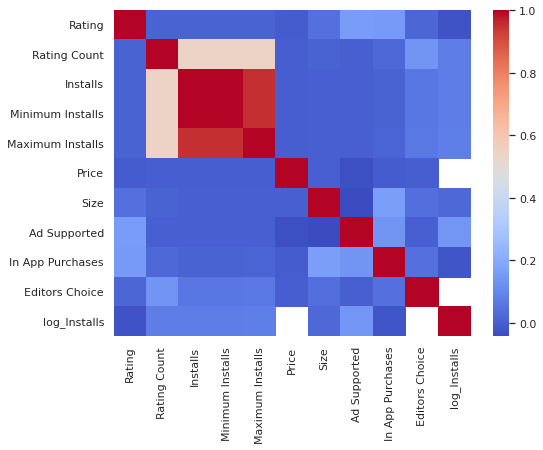

In [189]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar= True, cmap='coolwarm')

##Observation :     
 Factors like AdSupport and InappPurchases are correlated to app rating. So we can say that if the app provides customer support and have subscription plans we can engage more customers. We can also see from the same graph that the editor's choice plays a important role as well. With high editor choice we can see high ratings count and high installs.


##Q - What are the Top 5 Paid Apps based With highest ratings and installs ?

In [ ]:
df['Installs'].max()

In [191]:
paid_apps = df[(df.Type=='Paid') & (df.Installs >= 5000000)]
paid_apps = paid_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)

Text(0.5, 1.0, 'Top 5 Paid Rated Apps')

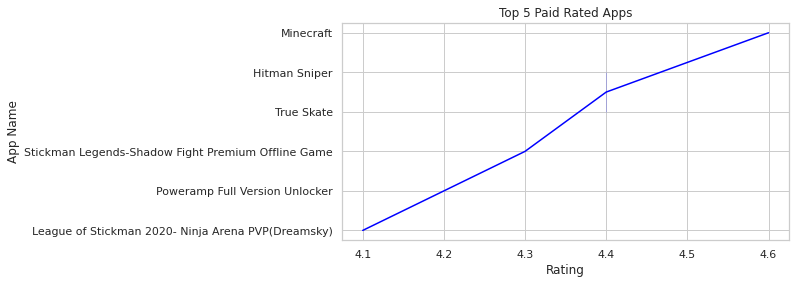

In [192]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='Blue')
plt.title("Top 5 Paid Rated Apps")

## Ans - Minecraft, Hitman Sniper, True Skate, Stickman Legends-Shadow Fight Premium Offline Game, Poweramp Full Version Unlocker, League of Stickman 2020- Ninja Arena PVP(Dreamsky)

##Q - What are the Top 5 Free Apps based With highest ratings and installs ?

In [193]:
free_apps = df[(df.Type=='Free') & (df.Installs >= 5000000)]
free_apps = free_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)
free_apps = free_apps.head(5)

Text(0.5, 1.0, 'Top 5 Free Rated Apps')

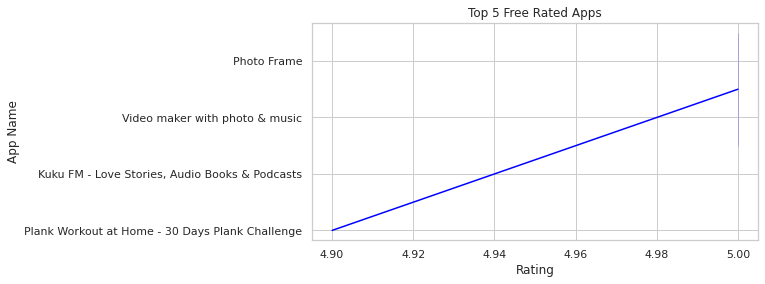

In [194]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
sns.lineplot(x = free_apps.values, y = free_apps.index,color = 'Blue')
plt.title("Top 5 Free Rated Apps")

## Ans - Photo Frame, Video maker with photo & music, Kuku FM - Love Stories,Audio Books & Podcasts, Plank Workout at Home.

## Visualize the categories that have the Top 10  Max Installations 


Text(0.5, 1.0, 'Top 10 Max installations Category wise')

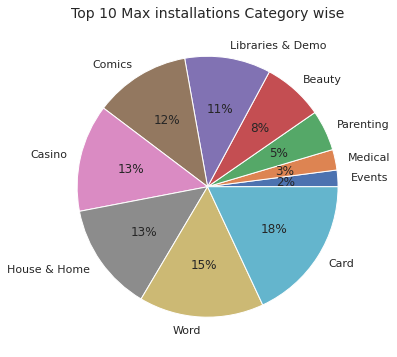

In [195]:
plt.figure(figsize=(8,6))
data = df.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels,autopct='%.0f%%') 
plt.title("Top 10 Max installations Category wise", fontsize=14)

## Visualize the Top 10 installation Categories that Adults have installed the most 

In [196]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

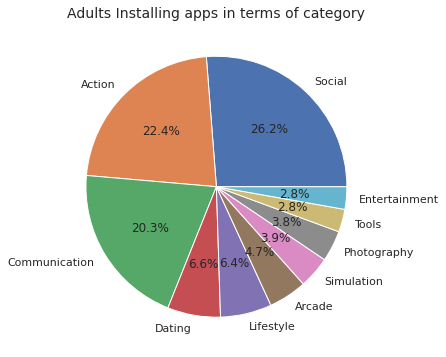

In [199]:
plt.figure(figsize=(8,6))
Adult = df[(df['Content Rating']=='Adults')]
Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing apps in terms of category", fontsize=14)

## Observation :
Most of the Adults showing intrest in downloading the Social, Action and Communication Category

Text(0.5, 1.0, 'Teen Installing apps in terms of category')

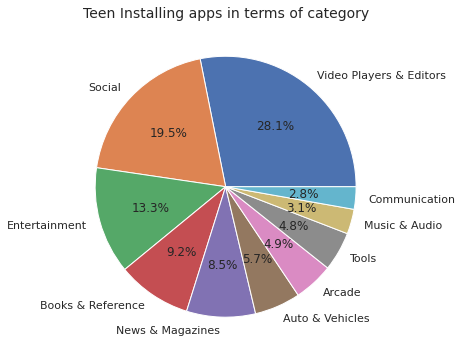

In [200]:
plt.figure(figsize=(8,6))
Teen = df[(df['Content Rating']=='Teen')]
Teen = Teen.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x = Teen, autopct="%.1f%%", labels=labels)
plt.title("Teen Installing apps in terms of category", fontsize=14)

# **Summary and Conclusion** :     
* People are more intrested to install the gaming Apps, the top Rating is given to the gaming apps.
* InAppPurchases are correlated to App rating. So we can say that if the app provides customer support and have subscription plans it will helps to engage customers.
* most people does not gave rating, But the people who are given rating are tend to give 4+ rating the most.
* Most of the Audlts installed the Social and communication Apps. 
* Most of the installations are done by the teens and the most are Video Players and Editors. Video Players and Editors has more demand.
* Size of the Application varies the installations.
* People are mostly dwonladed the free apps the installation of the free apps is high and the availabilty of the free apps also is very high.
 
